# Importing dependencies

In [2]:
import pickle 
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import imghdr
import pandas as pd

print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.12.0


# Importing data

In [9]:
data_dir_train = 'data/train'
data_dir_test = 'data/test' #Add path of the data folder

In [10]:
os.listdir(data_dir_train)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [62]:
train = tf.keras.utils.image_dataset_from_directory(data_dir_train, 
                                                    batch_size = 32,
                                                   label_mode = 'categorical',
                                                   shuffle = True,
                                                    color_mode = 'grayscale',
                                                    image_size=(48,48))
train_iterator = train.as_numpy_iterator()

Found 28709 files belonging to 7 classes.


In [63]:
test = tf.keras.utils.image_dataset_from_directory(data_dir_test, batch_size = 64,
                                                  label_mode = 'categorical',
                                                   shuffle = False,
                                                   color_mode = 'grayscale',
                                                   image_size=(48,48))
test_iterator = test.as_numpy_iterator()

Found 7178 files belonging to 7 classes.


In [64]:
# Some checks
batch = train_iterator.next()
#batch[0].shape
print(f"Shape of input data {batch[0].shape[1:3]} \nShape of output labels data {batch[1].shape[1:]}")
print(f"Batch size {batch[0].shape[0]}")
#First element refers to items in one batch

Shape of input data (48, 48) 
Shape of output labels data (7,)
Batch size 32


# Data Exploration

In [67]:
class_names = test.class_names
class_names


['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

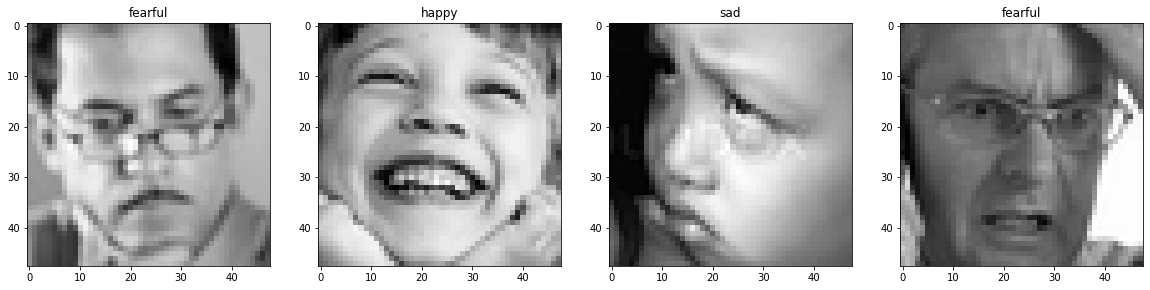

In [70]:
batch = train_iterator.next() #grabbing one batch
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int), cmap = 'gray')
    #ax[idx].title.set_text(batch[1][idx])
    ax[idx].title.set_text(class_names[np.argmax(batch[1][idx])])

# Preprocessing images

In [38]:
print(f" {train.as_numpy_iterator().next()[0].min()} min ")
print(f" {train.as_numpy_iterator().next()[0].max()} max ")

#Scaling
train = train.map(lambda x,y: (x/255, y))
test = test.map(lambda x,y: (x/255, y))

#Checks
print("After scaling ")
print(f" {train.as_numpy_iterator().next()[0].min()} min ")
print(f" {train.as_numpy_iterator().next()[0].max()} max ")

 0.0 min 
 255.0 max 
After scaling 
 0.0 min 
 1.0 max 


# Splitting Train and Validation data

In [39]:
train_size = int(len(train)*.8)
val_size = int(len(train)*.2)
test_size = int(len(test))
print(f"Train size = {train_size} \nValidation size = {val_size} \ntest_size = {test_size}")

Train size = 718 
Validation size = 179 
test_size = 113


In [40]:
val = train.skip(train_size).take(val_size)
train = train.take(train_size)

# Saving processed data

In [59]:
val.save("val_ds") #Specify path with file name "val_ds"
train.save("train_ds")
test.save("test_ds")

#loaded_dataset = tf.data.Dataset.load("val_ds")